<a href="https://colab.research.google.com/github/varthini-30/tasksgenai/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import ( Dense, Conv2D, Conv2DTranspose, Flatten, Reshape, BatchNormalization, LeakyReLU, Input)

In [ ]:
#Hyperparameters
BATCH_SIZE = 64
IMG_SIZE = 128
LATENT_DIM = 100
EPOCHS=100

LR = 2e-4

In [ ]:
def build_generator(latent_dim=100):
  return tf.keras. Sequential([
      Input((latent_dim,)),
      Dense (8*8*512, use_bias=False),
      Reshape((8, 8,512)),
      Conv2DTranspose (256, 4, 2, "same", use_bias=False),
      BatchNormalization(), LeakyReLU(),
      Conv2DTranspose(128, 4, 2, "same", use_bias=False),
      BatchNormalization(), LeakyReLU(),
      Conv2DTranspose (64, 4, 2, "same", use_bias=False),
      BatchNormalization() , LeakyReLU(),
      Conv2DTranspose(3, 4, 2, "same", activation="tanh")
      ], name="Generator")

In [ ]:
def build_discriminator(img_size=128):
  return tf.keras. Sequential([
      Input((img_size, img_size, 3)),
      Conv2D (64, 4, 2, "same"),LeakyReLU (0.2),
      Conv2D(128, 4, 2, "same"),LeakyReLU(0.2),
      Conv2D(256, 4, 2, "same"),LeakyReLU (0.2),
      Conv2D(512, 4, 2, "same"),LeakyReLU (0.2),
      Flatten(),
      Dense (1)
      ], name="Discriminator")

In [ ]:
G, D = build_generator(), build_discriminator()

In [ ]:
# Optimizers & loss

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

g_opt= tf.keras.optimizers.Adam (LR, 0.5)

d_opt= tf.keras.optimizers.Adam (LR, 0.5)

In [ ]:
@tf.function
def train_step(real):
  noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])
  with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
    fake =  G(noise, training=True)
    r_out, f_out = D(real, training=True), D(fake, training=True)
    g_loss= loss_fn(tf.ones_like(f_out), f_out)
    d_loss =loss_fn(tf.ones_like(r_out), r_out) +loss_fn( tf.zeros_like(f_out), f_out)
    g_opt.apply_gradients(zip(g_tape.gradient(g_loss, G.trainable_variables), G.trainable_variables))
    d_opt.apply_gradients(zip(d_tape.gradient(d_loss, D.trainable_variables), D.trainable_variables))
    return g_loss, d_loss

In [ ]:
def show_images (epoch, seed):
  preds =  G(seed, training = False)
  preds =(preds+1)/2.0
  fig, axes= plt.subplots (4,4, figsize= (6,6))
  for i, ax in enumerate (axes.flat):
    ax.imshow(preds[1].numpy())
    ax.axis("off")

plt.suptitle(f"Epoch (epoch)")
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
#Load dataset (resize to 128x128, normalize to [-1,1])
train_ds = tf.keras.utils.image_dataset_from_directory(

    "/content/drive/MyDrive/FakeFace-main",

    label_mode=None,

    image_size=(IMG_SIZE, IMG_SIZE),

    batch_size=BATCH_SIZE

).map(lambda x: (tf.cast(x, tf.float32) / 127.5) - 1.0).prefetch( tf.data.AUTOTUNE)



Found 362 files.


Epoch 1/100 | G: 1.290 D: 0.982
Epoch 2/100 | G: 1.439 D: 0.929
Epoch 3/100 | G: 0.725 D: 1.067
Epoch 4/100 | G: 1.000 D: 0.962
Epoch 5/100 | G: 0.281 D: 1.648
Epoch 6/100 | G: 1.168 D: 1.041
Epoch 7/100 | G: 0.922 D: 1.014
Epoch 8/100 | G: 0.432 D: 1.382
Epoch 9/100 | G: 1.088 D: 1.180
Epoch 10/100 | G: 1.519 D: 1.238
Epoch 11/100 | G: 0.834 D: 1.186
Epoch 12/100 | G: 0.632 D: 1.220
Epoch 13/100 | G: 1.048 D: 1.231
Epoch 14/100 | G: 0.725 D: 1.211
Epoch 15/100 | G: 0.915 D: 1.145
Epoch 16/100 | G: 1.057 D: 1.002
Epoch 17/100 | G: 0.730 D: 1.128
Epoch 18/100 | G: 1.179 D: 1.190
Epoch 19/100 | G: 0.692 D: 1.176
Epoch 20/100 | G: 0.889 D: 1.144
Epoch 21/100 | G: 0.616 D: 1.411
Epoch 22/100 | G: 0.909 D: 1.096
Epoch 23/100 | G: 0.730 D: 1.219
Epoch 24/100 | G: 1.045 D: 1.373
Epoch 25/100 | G: 0.846 D: 1.134
Epoch 26/100 | G: 0.811 D: 1.321
Epoch 27/100 | G: 0.859 D: 1.190
Epoch 28/100 | G: 1.266 D: 1.267
Epoch 29/100 | G: 0.826 D: 1.255
Epoch 30/100 | G: 0.808 D: 1.314
Epoch 31/100 | G: 0

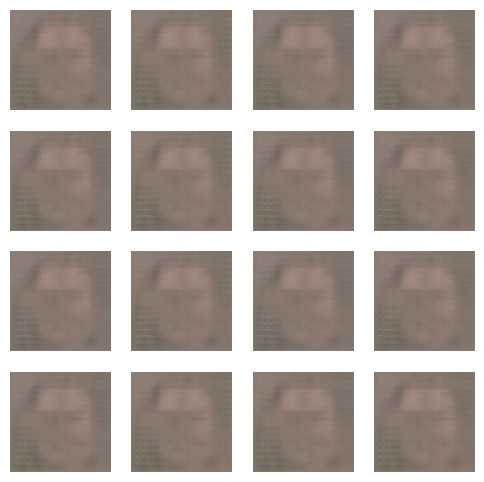

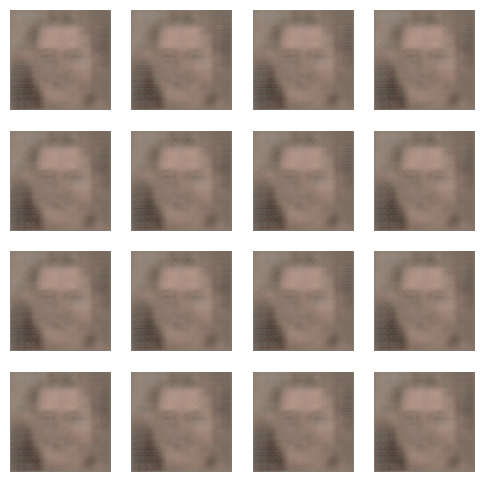

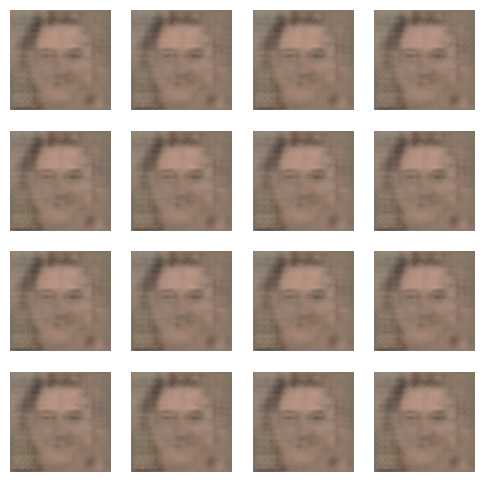

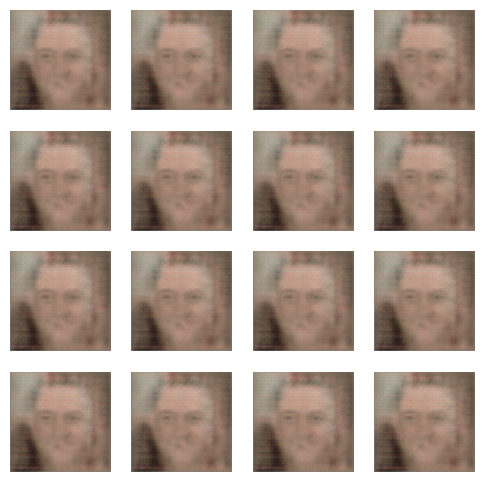

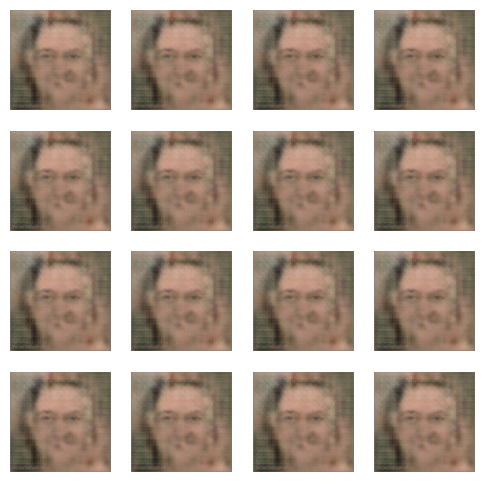

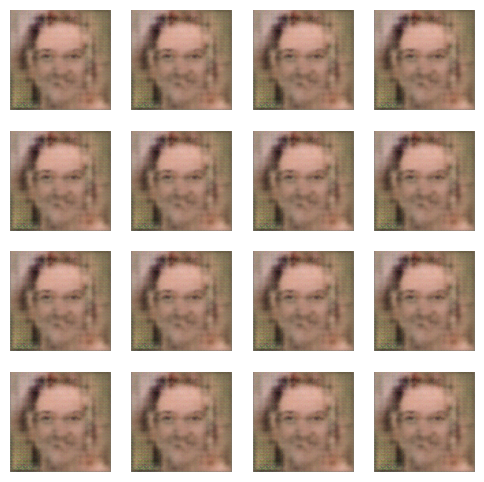

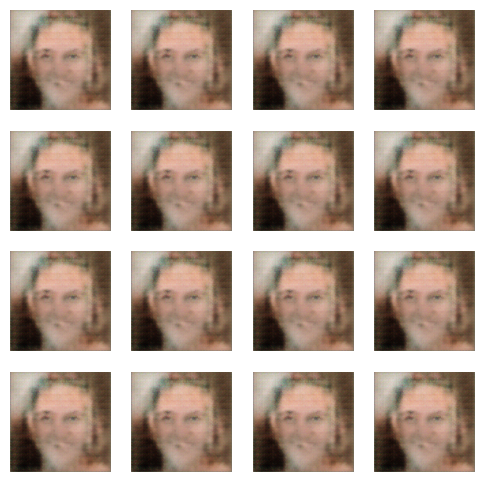

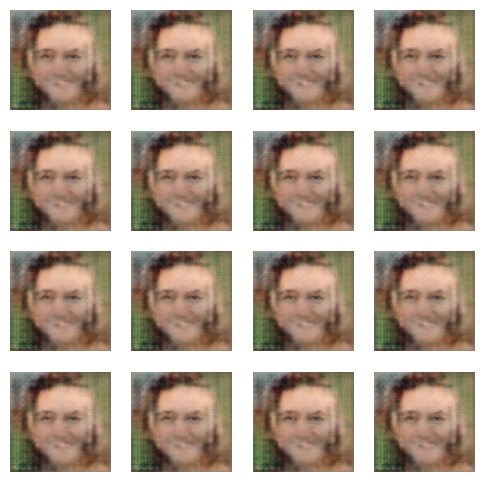

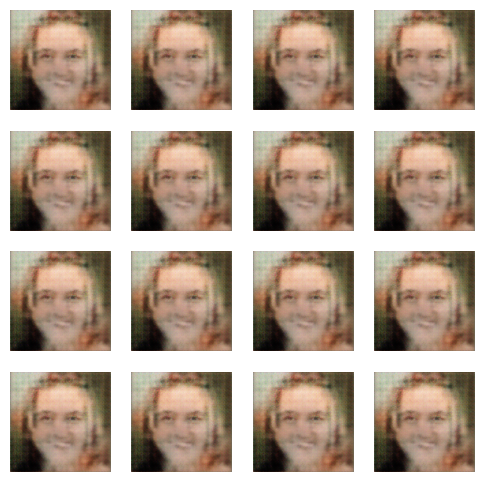

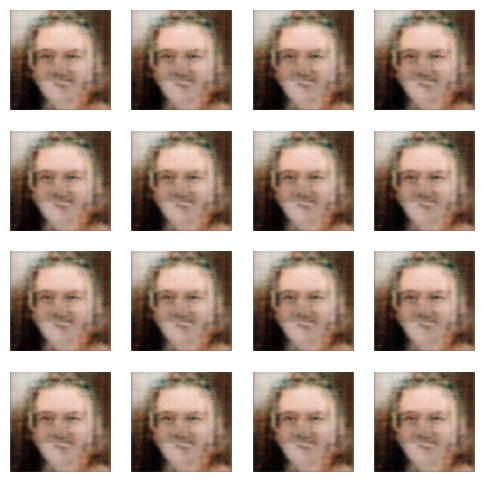

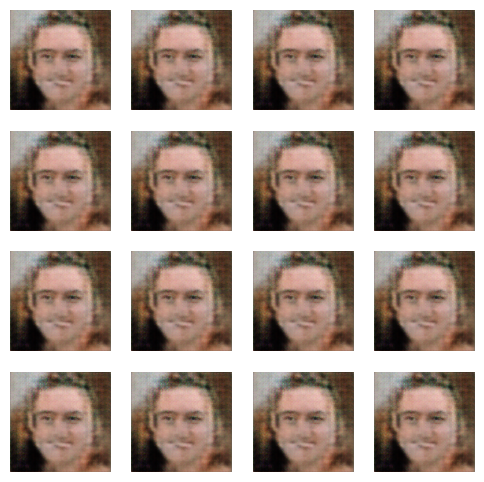

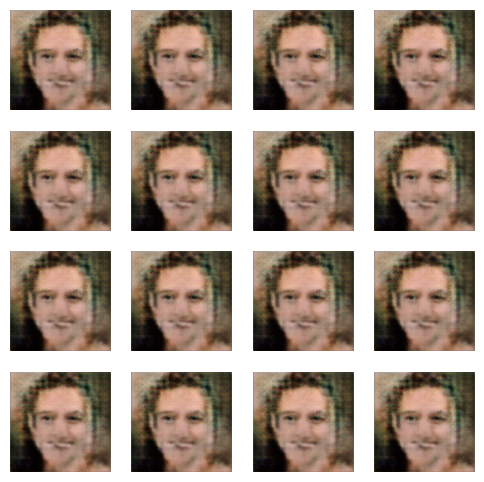

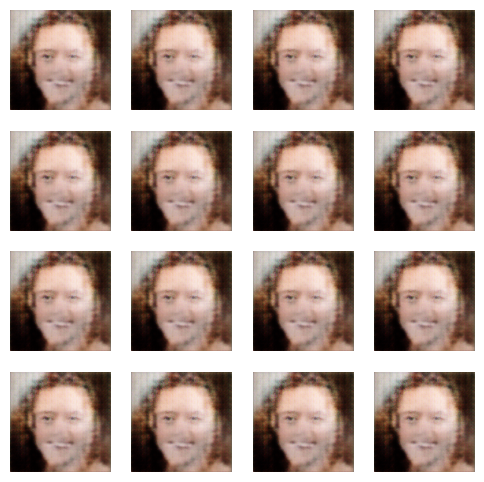

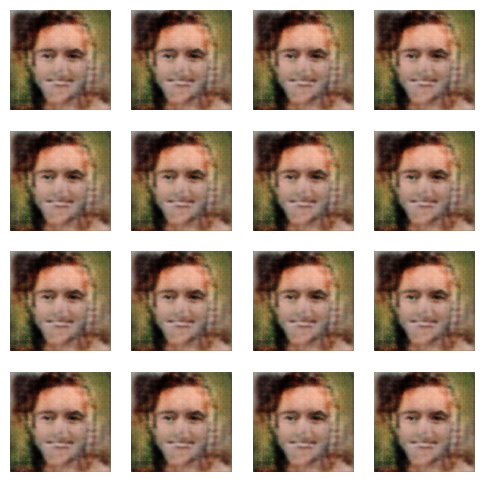

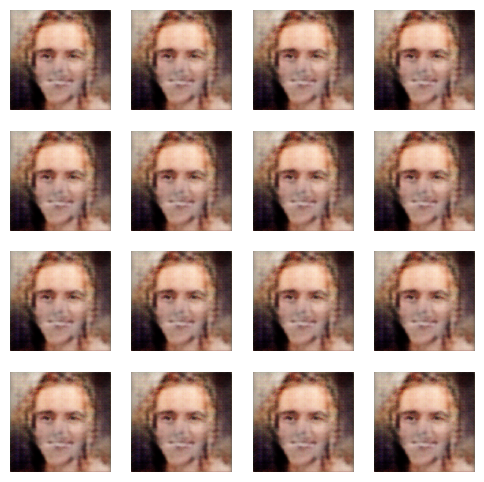

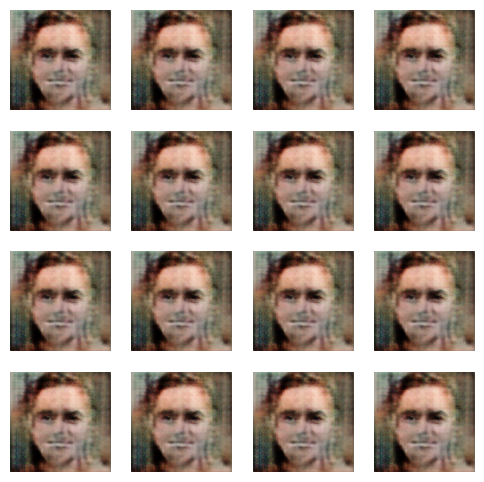

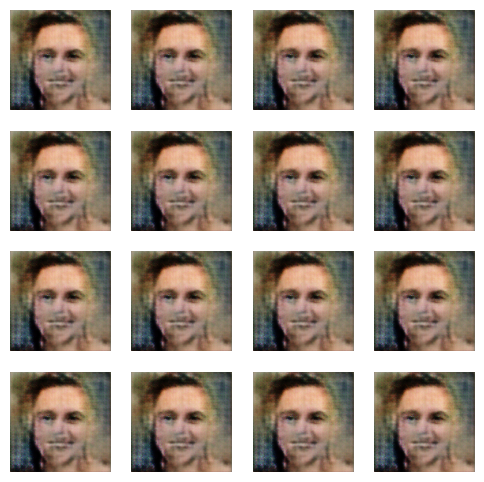

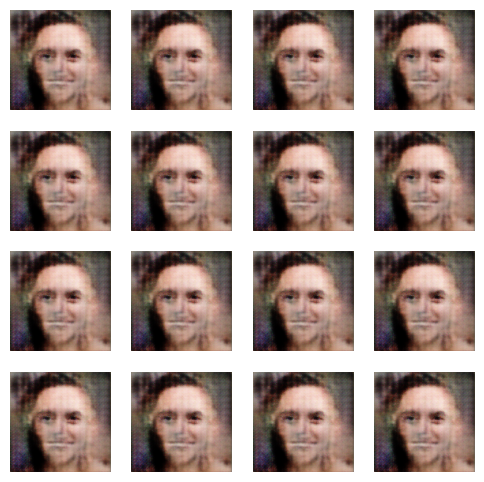

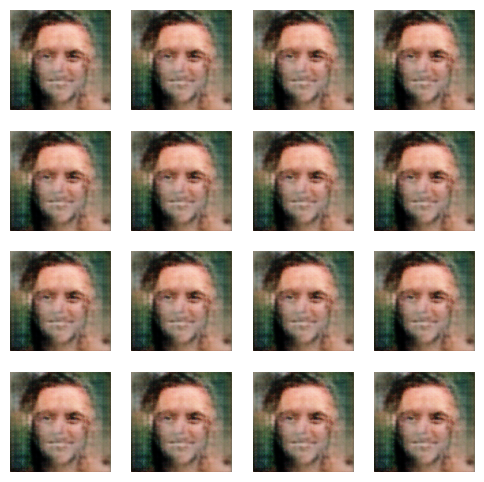

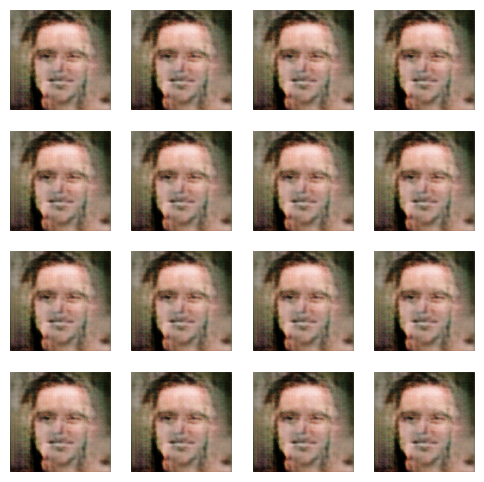

In [ ]:
# Training loop
seed = tf.random.normal([16, LATENT_DIM])
for e in range(1, EPOCHS+1):
  for real in train_ds:
    g_loss, d_loss = train_step(real)
  print(f"Epoch {e}/{EPOCHS} | G: {g_loss:.3f} D: {d_loss:.3f}")
  if e % 5 == 0:
    show_images(e, seed)